<a href="https://colab.research.google.com/github/Fatai-soliu/bank-telemarketing/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Client Subscription to Term Deposits Using Machine Learning: A Comparative Analysis of KNN (Logistic regression) and Decision Tree Algorithm

This notebook focus on the analysis and

In [1]:
#Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Import the dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/bank.csv')

In [3]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
#Check the information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


The dataset contains 4521 records with 17 features containing both 7 numerical  and 10 categorical data. There are no missing values in this data.

In [5]:
data.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


`Age`: The minimum client age is 19 years and maximum is 87. Average age of the cient is 41.17

`Balance`:

`day`:

`duration`:

`campaign`:

`pdays`:

`previous`:



In [6]:
data.shape

(4521, 17)

In [7]:
## Check for missing data
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


There are no missing values in this dataset

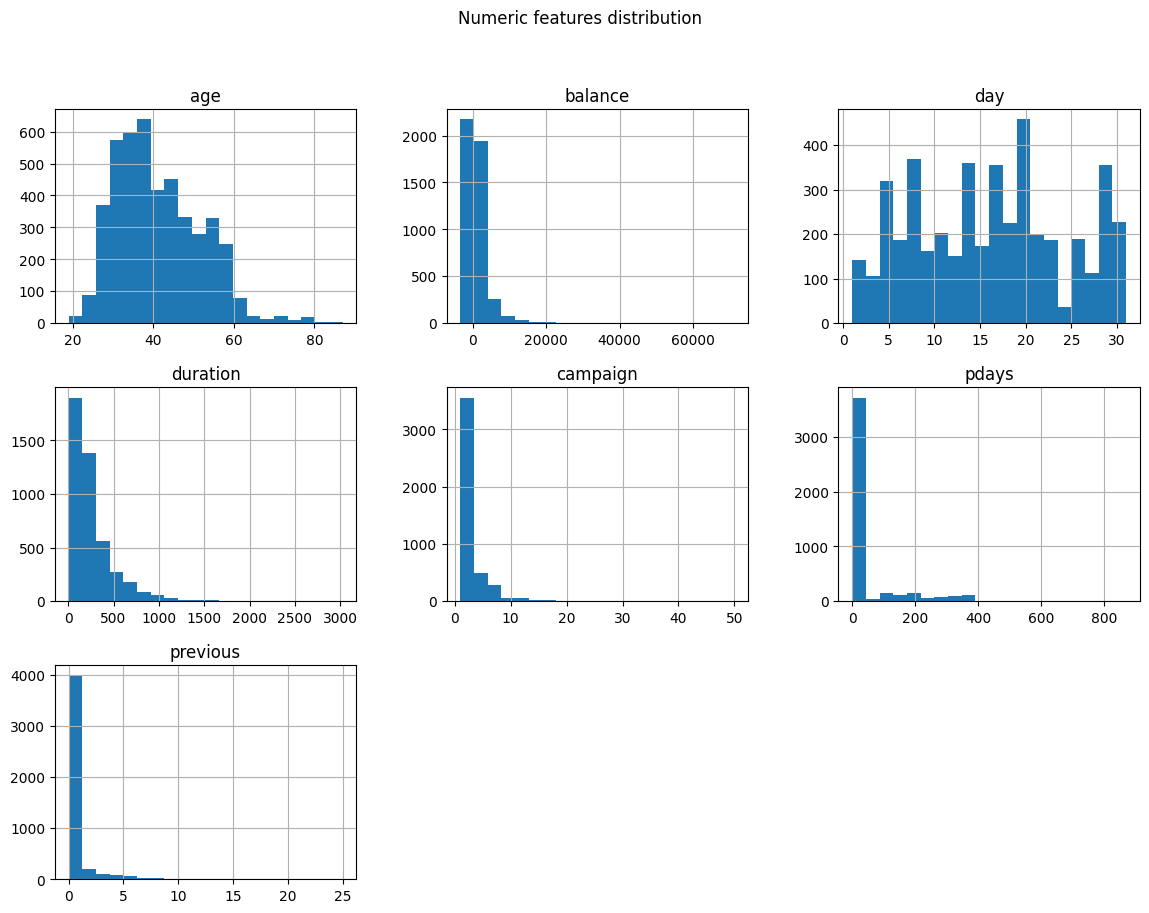

In [8]:
#Creating a histogram to visualise the data distribution for numeric columns

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

data[numeric_columns].hist(figsize=(14, 10), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()

Based on the histogram above, majority of the clients age fall between 29 years to 60 years

##Handling Outliers

To visualise and Identify outliers, boxplot were used on numerical columns `Age`, `balance`, `day`, `duration`, `campaign`, `pdays` and `previous`. These visualistions helps to identify the noises and distortion in the data



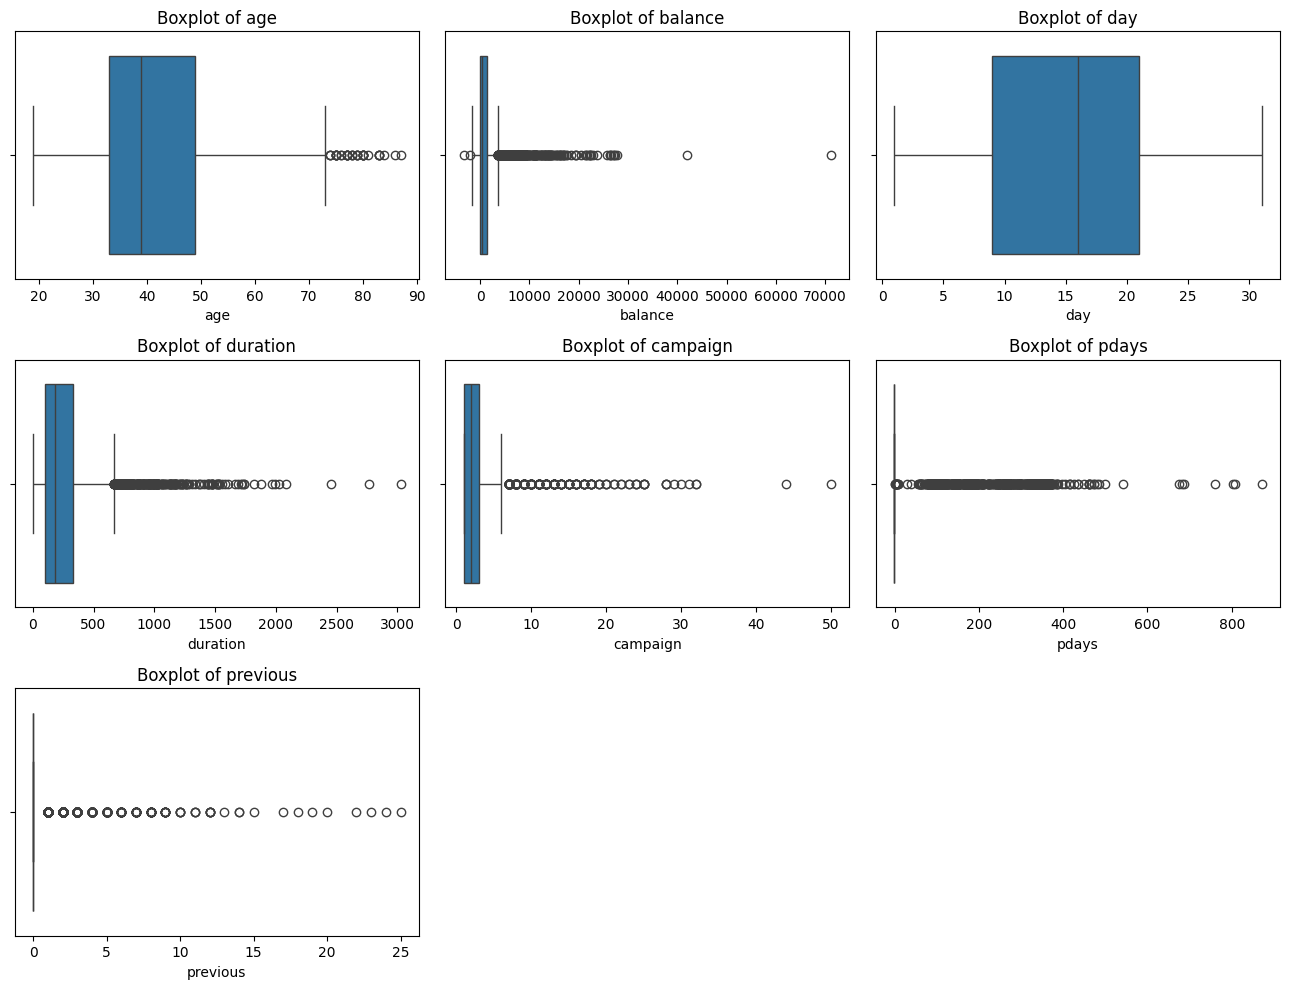

In [9]:
# Creating a boxplot for all numeric data in the dataset too spot outlier

numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(13, 10))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

Majority of the numeric columns contain outlier, outliers are indicated by the point below or above the whiskers of the boxplot as seen in boxplot of `Age`, `balance`, `duration` and `campaign`.  

Similarly the values in pdays and previous have a small range and mostly the same, hence the absense of the box.

Outliers were investigated further to confirm if they are valid or are as a result of errors and then handled accordinly

The Outliers will be handled using 2 different methods.

1. IQR Method (for `age`, `day`, `duration`): This method is used to cap outliers while maintaining good pattern in the dataset. it works well on normally distributed dataset like the numeric columns above

2. 99th Percentile Capping (for `balance`, `campaign` and `previous`) : This method is used on numeric columns with high skewness (as found in most financial & marketing data) but valid data. This is to ensure data still retain natural distribution

In [10]:
#Handling outlier - Capping outliers using Interquartile Range (IQR) method

def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return data

iqr_columns = ['age', 'day', 'duration']
for col in iqr_columns:
    data = cap_outliers_iqr(data, col)

print(data.head())

    age          job  marital  education default  balance housing loan  \
0  30.0   unemployed  married    primary      no     1787      no   no   
1  33.0     services  married  secondary      no     4789     yes  yes   
2  35.0   management   single   tertiary      no     1350     yes   no   
3  30.0   management  married   tertiary      no     1476     yes  yes   
4  59.0  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct      79.0         1     -1         0  unknown  no  
1  cellular   11   may     220.0         1    339         4  failure  no  
2  cellular   16   apr     185.0         1    330         1  failure  no  
3   unknown    3   jun     199.0         4     -1         0  unknown  no  
4   unknown    5   may     226.0         1     -1         0  unknown  no  


In [11]:
#Handling outlier - Capping outliers using 99th percentile-based method

def cap_outliers_percentile(data, column):
    upper_bound = data[column].quantile(0.99)
    data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else x)
    return data

percentile_columns = ['balance', 'campaign', 'previous']
for col in percentile_columns:
    data = cap_outliers_percentile(data, col)

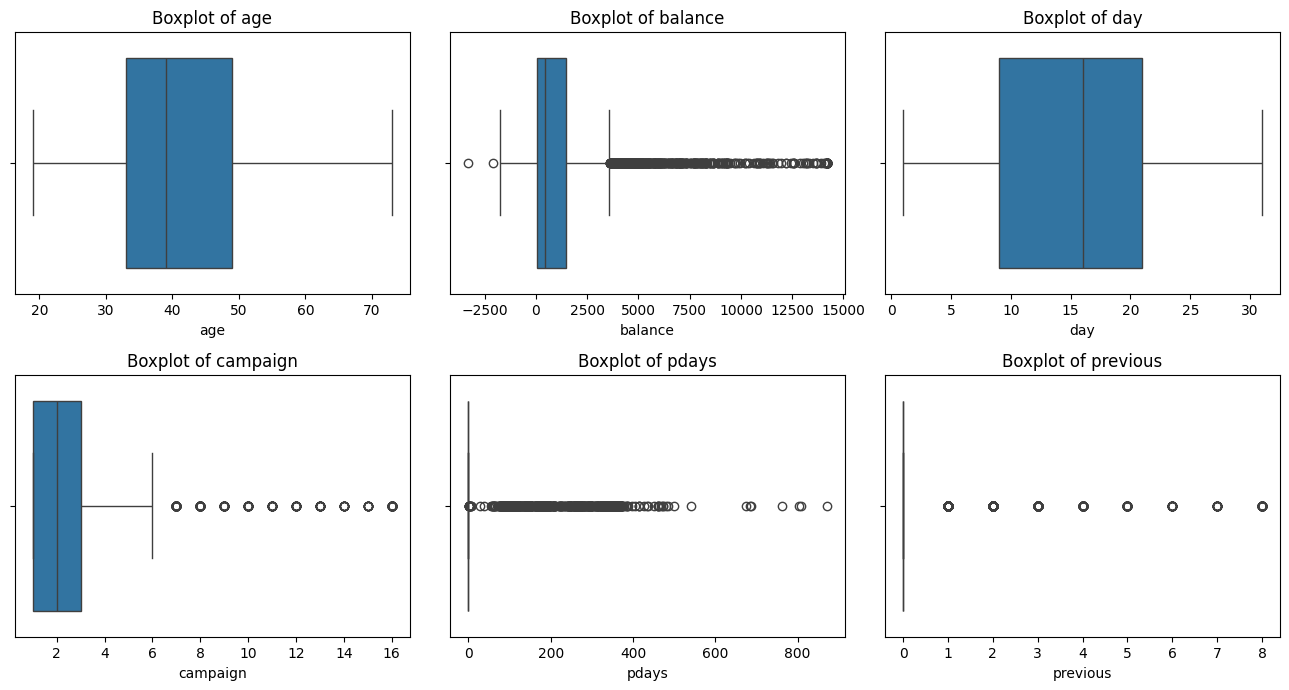

In [12]:
# Re-visualising the numeric columns after treating outliers

numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(13, 10))

for i, col in enumerate(numeric_columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(x = data[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.tight_layout()

plt.show()

The dataset has now been cleaned, making it more reliable for further analysis.

In [13]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.123203,1352.030878,15.915284,241.785667,2.725061,39.766645,0.503871
std,10.416974,2428.934930,8.247667,185.397346,2.626585,100.121124,1.383866
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,73.000000,14194.600000,31.000000,666.500000,16.000000,871.000000,8.000000


## Exploratory Data Analysis

This EDA stage will focus on understanding the feature better and selecting the best features that is suitable for model training. The EDA will include Univariate Descriptive analysis and Bivariate inferential analysis

In [14]:
# Checking the correlation between the numeric variables and the target column y

data['y'] = data['y'].map({'yes': 1, 'no': 0})

corr = data.corr(numeric_only=True)['y'].sort_values(ascending=False)
corr

,y
y,1.000000
duration,0.393818
previous,0.141416
pdays,0.104087
age,0.041021
balance,0.027570
day,-0.011244
campaign,-0.065348


Important note: duration, in seconds (numeric). this attribute highly affects the output target (e.g., if duration=0 then y='no'). and it can only be known after a call has already been performed and not before. By this time, y is obviously known as well. It also has the hightest positive correlation (0.393818) to the target variable compared to other **numeric **variable.

So to be able to build a realistic predictive model. This duration column needs to be dropped to prevent the model from overfitting

In [15]:
# Drop the duration column

data = data.drop(['duration'], axis=1)

## Univariate Descriptive Analysis

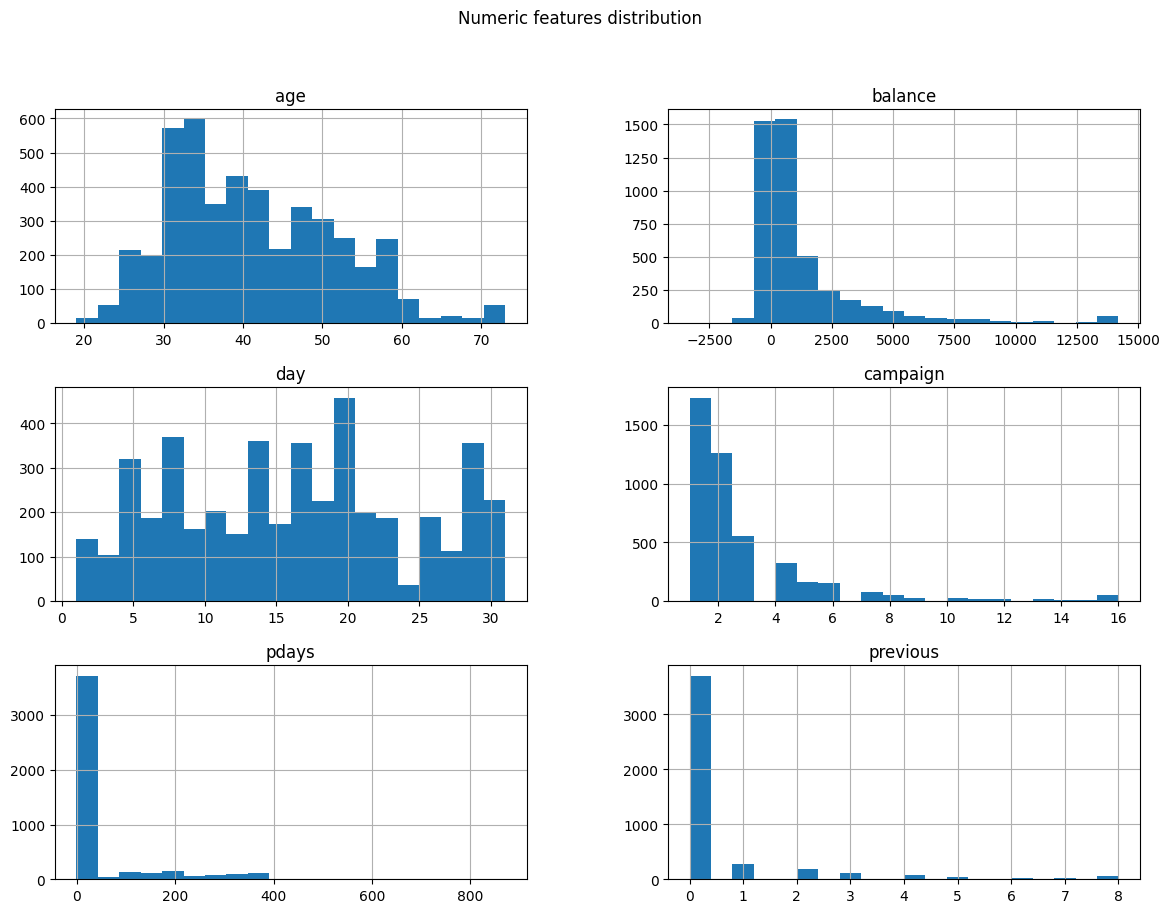

In [16]:
# Plotting histograms for numeric features

data[numeric_columns].hist(figsize=(14, 10), bins=20)
plt.suptitle('Numeric features distribution')
plt.show()


The histogram above shows the distribution of the data. The data are less skewed compared the result prior to outlier handling.

##Bivariate Analysis

This analysis is done to understand the relationship between the features and the target variables. This will help identify important features that can be used in our model

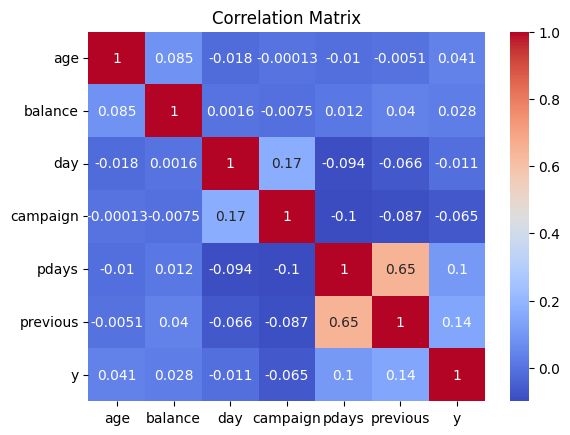

In [17]:
# Correlation matrix for numeric features vs target variables

numeric_columns = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'y']

correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Each of the numeric features has a relatively weak correlation to the target variable `y`. `day` and `campaign` has a weak negative correlation to the `y` target

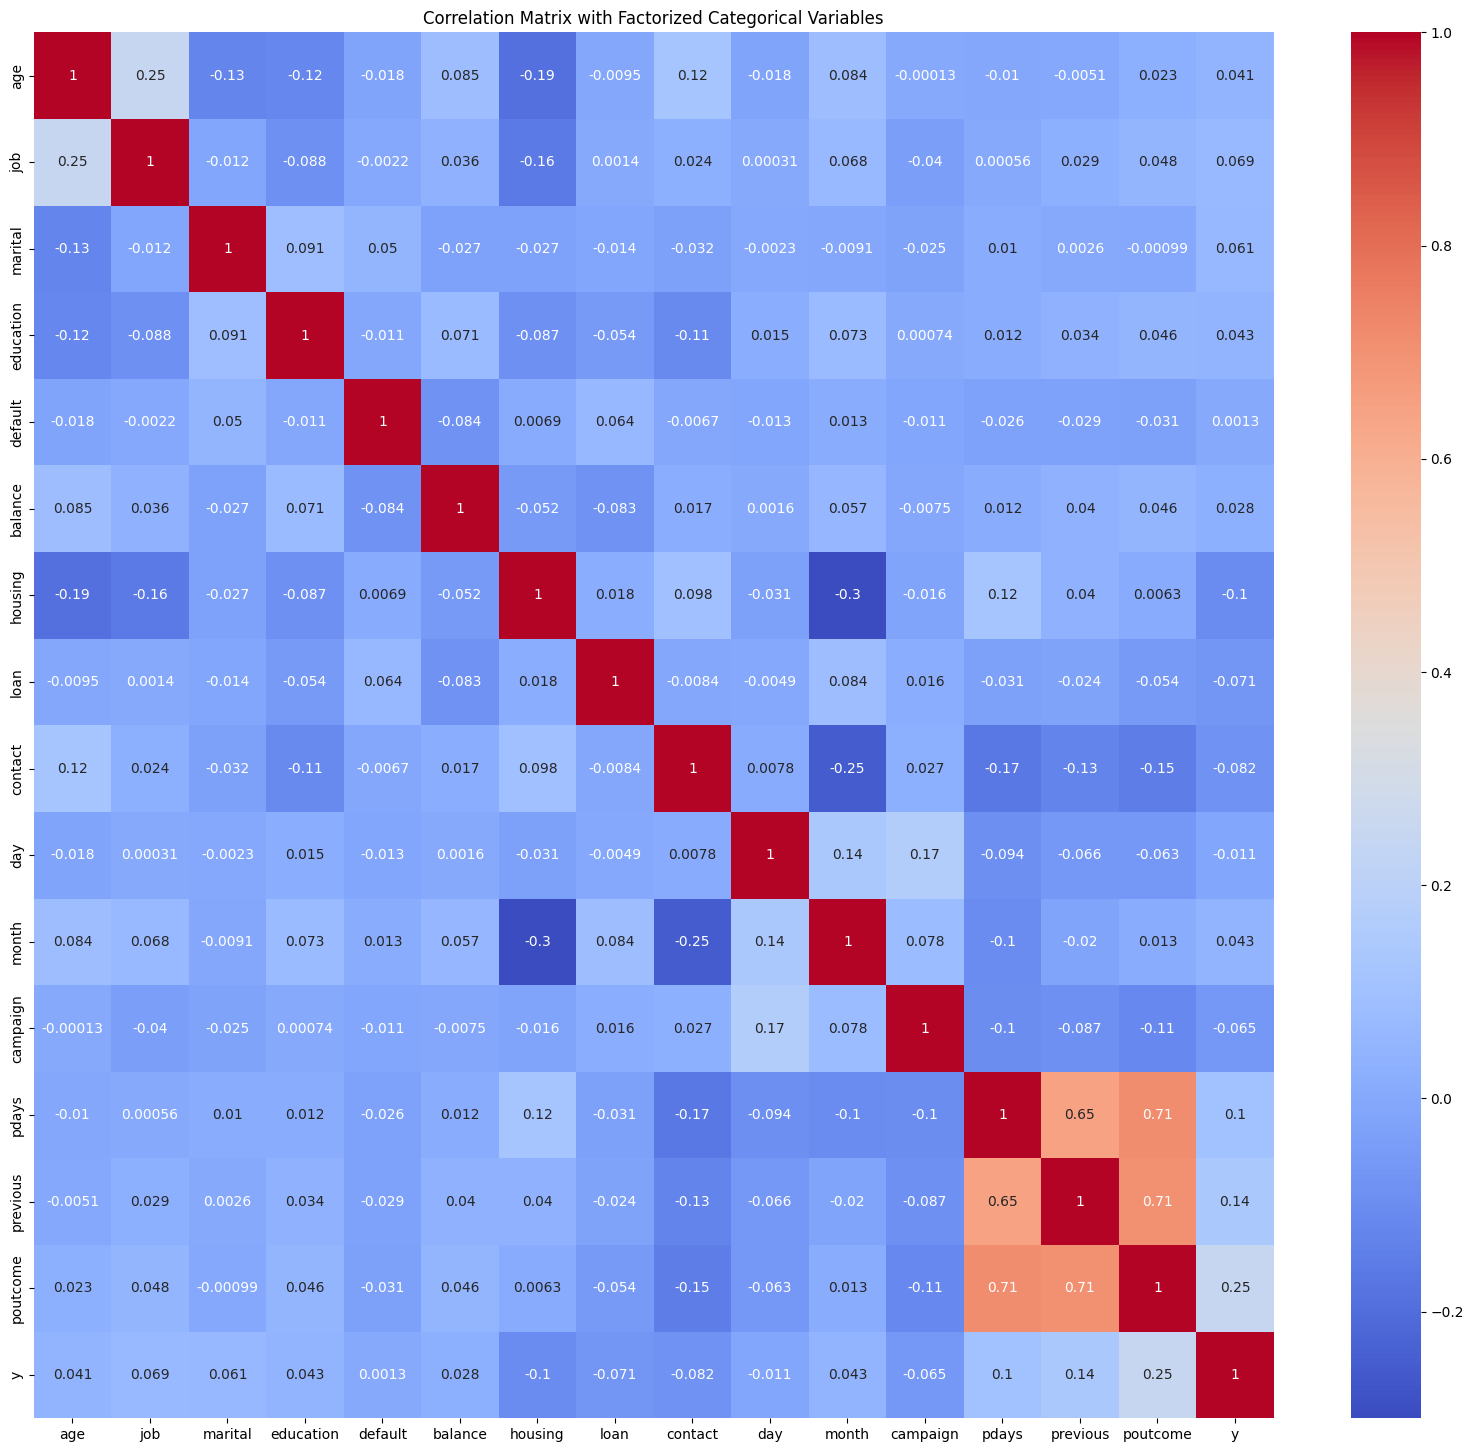

In [38]:
# Factorizing all categorical columns to integers to check correlation

df_temp = data.copy()
for col in df_temp.select_dtypes(include=['object']).columns:
    df_temp[col] = pd.factorize(df_temp[col])[0]

# Calculate and plot the correlation matrix
correlation_matrix = df_temp.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Factorized Categorical Variables")
plt.show()

There is a strong correlation between `poutcome`, `pdays` and `previous`. poutcome also has a fairly higher correlation with the target variables than other variables   

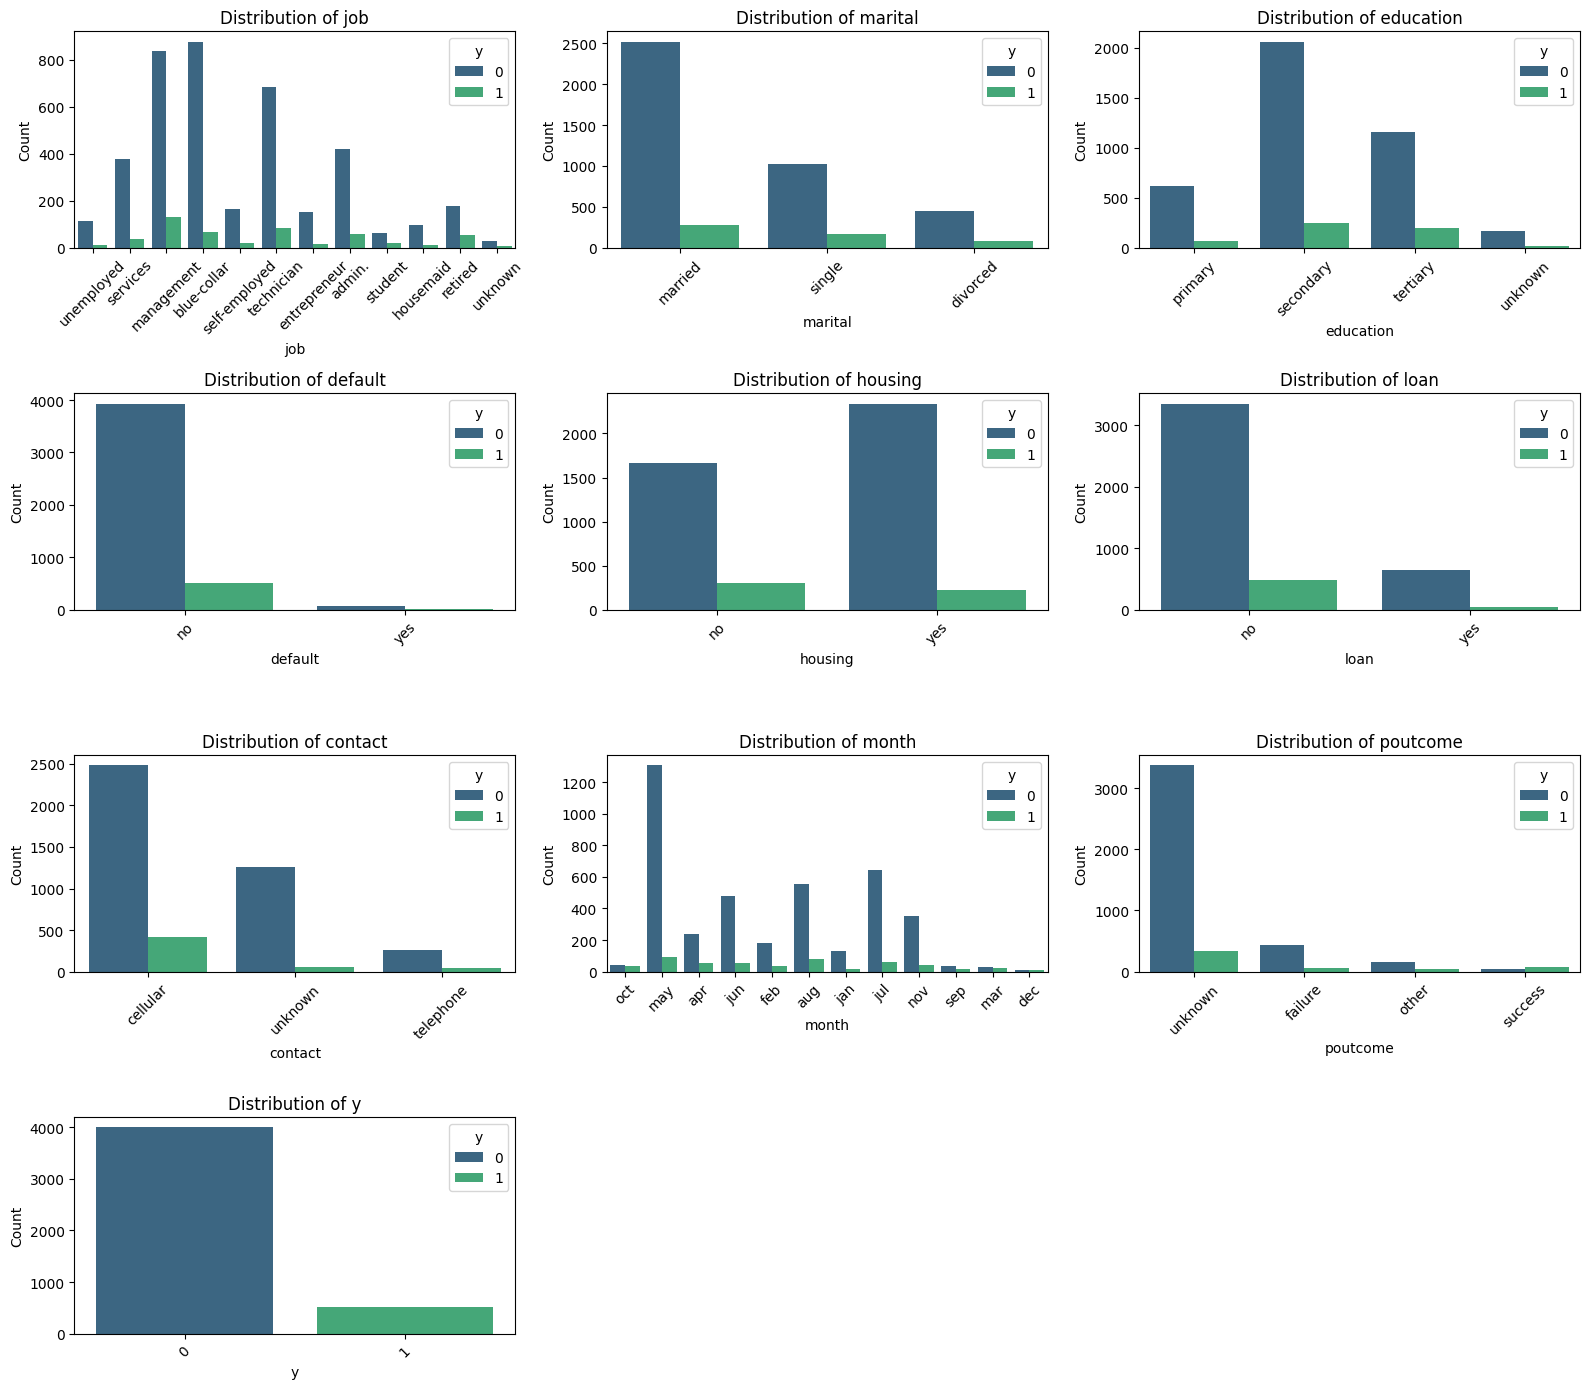

In [18]:
# Plot a bar chart for each categorical feature showing the count of each category

categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

plt.figure(figsize=(16, 14))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=data, x=col, palette="viridis", hue='y')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

`Job`: The Job category have a diverse distribution. management and blue-collar appears more frequently than others. entreprenuer appear less frequently.

`Marital`: The marital status distribution shows a large number of married individuals, followed by single and divorced.

`Education`: Education level is has a diverse distribution, with majority counts been across secondary and tertiary while few are unknown.

`Default`: The majority of values in default are no, indicating very few individuals with a history of credit default.

`Housing`: The majority of clients have a housing loan (yes), though there is also a signifant proportion with no.

`Loan`: Similar to housing, najority of the clients do not have a personal loan, only a small fraction has personal loan.

`Contact`: The distribution of contact type (e.g., cellular, telephone) could reveal differences in customer preferences and responsiveness to contact methods. Majority were contact via cellular, while there is a noticable amount of unknown option and least clients are contacted via telephone

`Month`: Some months (e.g., may, jul) show significantly higher counts, suggesting seasonal trends in marketing campaigns.

`Poutcome`:  The majority of values are unknown, with fewer instances for success and failure. Despite the high rate of unknown, this feature is important

`Target`: This bar chart shows the distribution of the target variable, revealing the imbalance in classes. There is more `no` than `yes`. There is need to choose approacte metrics (like F1-score or AUC) to access model performance or using SMOTE (oversampling) or other methods for balancing



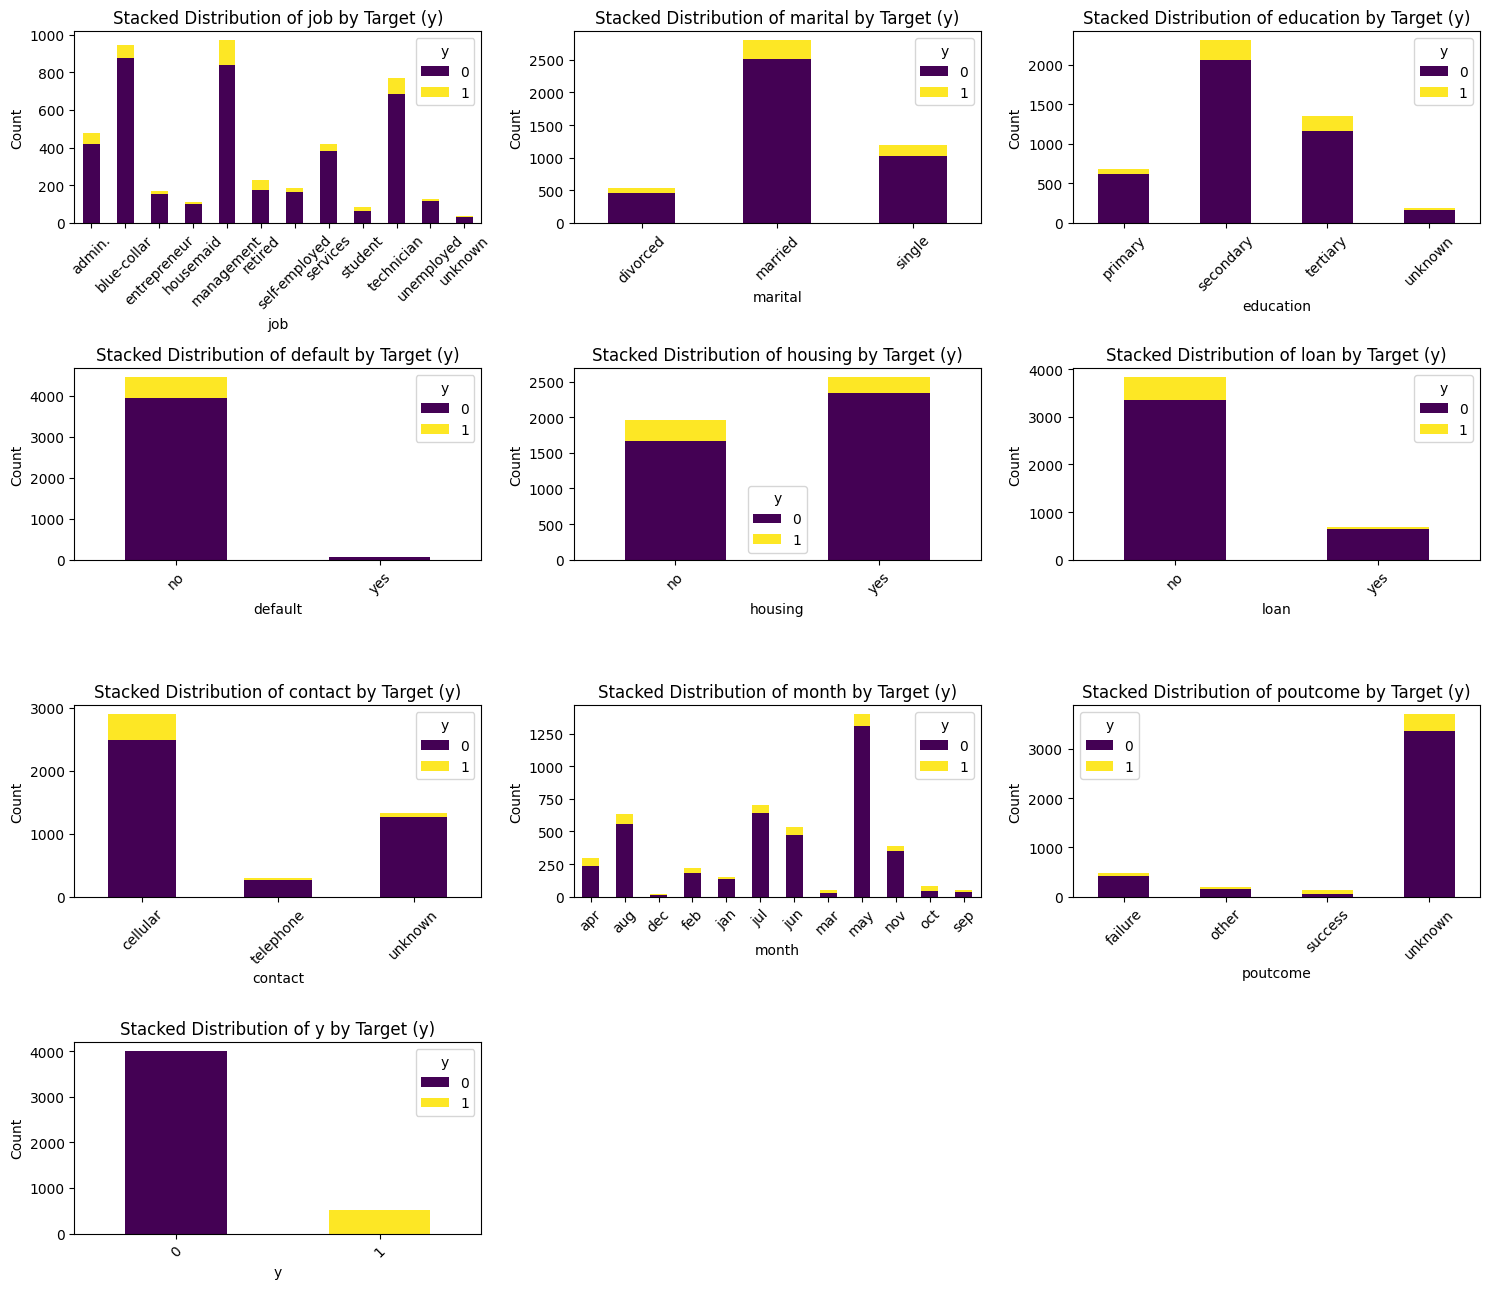

In [19]:
# Plot Stacked Bar chart to visualise relationship between categorical variables and the target variables

plt.figure(figsize=(15, 13))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)

    stacked_data = data.groupby([col, 'y']).size().unstack(fill_value=0)

    stacked_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

    plt.title(f'Stacked Distribution of {col} by Target (y)')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

`Job`: Certain jobs, such as management and self-employed, show higher proportions of term deposit subscriptions (y = yes), while roles like blue-collar and technician have a lower subscription rate. Certain job type therefore correlates strongly with subscription rate

`Education`: Higher education levels, especially tertiary, are associated with a higher likelihood of subscription. This suggests that education level may correlate with financial decision-making, this feature therefore will be important in the model.

`Poutcome` (Outcome of Previous Campaigns):  successful outcome in previous campaigns is a strong indicator of subscription, with a high percentage subscribing again (y = yes). This feature is important and predictive

`Contact`: Subscription rates vary with contact method (cellular has a higher success rate than telephone) but this maybe as a result of high propotion of celullar method.

`Month`: Certain months (like may) have notably lower subscription rates.

In [20]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,1.0,-1,0.0,unknown,0
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,1.0,339,4.0,failure,0
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,1.0,330,1.0,failure,0
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,4.0,-1,0.0,unknown,0
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,1.0,-1,0.0,unknown,0
5,35.0,management,single,tertiary,no,747.0,no,no,cellular,23,feb,2.0,176,3.0,failure,0
6,36.0,self-employed,married,tertiary,no,307.0,yes,no,cellular,14,may,1.0,330,2.0,other,0
7,39.0,technician,married,secondary,no,147.0,yes,no,cellular,6,may,2.0,-1,0.0,unknown,0
8,41.0,entrepreneur,married,tertiary,no,221.0,yes,no,unknown,14,may,2.0,-1,0.0,unknown,0
9,43.0,services,married,primary,no,-88.0,yes,yes,cellular,17,apr,1.0,147,2.0,failure,0


## Encoding Categorical Variables

**Methodologies for Encoding:**

**Label Encoding:**

Label encoding is a straightforward method that converts categorical values into numeric labels. This technique is particularly useful for ordinal data where categories have a natural order. For example, education can be encoded numerically to reflect their order.

**One-Hot Encoding:**

One-hot encoding is a technique that creates binary columns for each category in a categorical variable. This method is suitable for nominal data where categories do not have a natural order. One-hot encoding prevents the model from assuming any ordinal relationship between the categories.

In [21]:
#Convert all categorical variable to numeric using One-hot encoding
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder for ordinal categorical variables
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'education' column
data['education'] = label_encoder.fit_transform(data['education'])

nominal_columns = ['job', 'housing', 'loan', 'contact', 'default', 'month', 'poutcome', 'marital']

# Apply One-Hot Encoding to nominal categorical variables
encoded_data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

In [22]:
encoded_data.head()

,age,education,balance,day,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,marital_married,marital_single
0,30.0,0,1787.0,19,1.0,-1,0.0,0,False,False,...,False,False,False,True,False,False,False,True,True,False
1,33.0,1,4789.0,11,1.0,339,4.0,0,False,False,...,False,True,False,False,False,False,False,False,True,False
2,35.0,2,1350.0,16,1.0,330,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,30.0,2,1476.0,3,4.0,-1,0.0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
4,59.0,1,0.0,5,1.0,-1,0.0,0,True,False,...,False,True,False,False,False,False,False,True,True,False


One hot encoding was used because it suitable when majority of the categorical variable has no clear ordinal relationship

In [23]:
encoded_data.shape

(4521, 40)

There are now 40 columns in the data after applying one-hot encoding

## Features Selection


In [24]:
#Applying Variance Threshold to remove low or no variance features
from sklearn.feature_selection import VarianceThreshold

# Define target and features
y = encoded_data['y']
X = encoded_data.drop(columns='y')

# Initializing VarianceThreshold
selector = VarianceThreshold(threshold=0.03)
X_selected = selector.fit_transform(X)

In [25]:
# Get names of features that were retained
selected_columns = X.columns[selector.get_support(indices=True)]
print("Selected features based on Variance Threshold:\n", selected_columns)

print(f"{X.shape[1]-X_selected.shape[1]} features have been removed, {X_selected.shape[1]} features remain")

Selected features based on Variance Threshold:
 Index(['age', 'education', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_technician', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_may',
       'month_nov', 'poutcome_other', 'poutcome_unknown', 'marital_married',
       'marital_single'],
      dtype='object')
10 features have been removed, 29 features remain


After applying Variancethreshold and experimenting with different threshold value (0.01, 0.03 and 0.05). The threshold is set at 0.03 and 10 features with low variablity were removed

# Splitting dataset into train and test

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, stratify=y, random_state=10)

#Verifying the split

y_train_dist = y_train.value_counts()
y_test_dist = y_test.value_counts()

y_train.count(), y_test.count(), y_train_dist, y_test_dist

(3164,
 1357,
 y
 0    2799
 1     365
 Name: count, dtype: int64,
 y
 0    1201
 1     156
 Name: count, dtype: int64)

## Handling Class Imbalance

Class imbalance occurs when one class in a dataset is significantly more frequent than others. In this case, the "not subscribed" class (y = 0) is much more frequent than the "subscribed" class (y = 1). This can often lean to bias toward toward majority class i.e model tend to have high overall accuracy but poor performance on minority class.

To handle the Class imbalance, SMOTE method will be applied.

SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority samples, which can improve model learning on the minority class.


In [27]:
pip install -U imbalanced-learn

In [28]:
#Check the distribution of the target variable

encoded_data['y'].value_counts()

,count
y,
0,4000
1,521


88% of the observations belong to the not subscribed (Class 0)

In [62]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter

# Initialize SMOTETomek for resampling
smote_tomek = SMOTETomek(random_state=0)

# Apply SMOTETomek on the training data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution before and after resampling
print("Class distribution before SMOTETomek:", Counter(y_train))
print("Class distribution after SMOTETomek:", Counter(y_train_resampled))

Class distribution before SMOTETomek: Counter({0: 2799, 1: 365})
Class distribution after SMOTETomek: Counter({0: 2596, 1: 2596})


<Axes: xlabel='y', ylabel='count'>

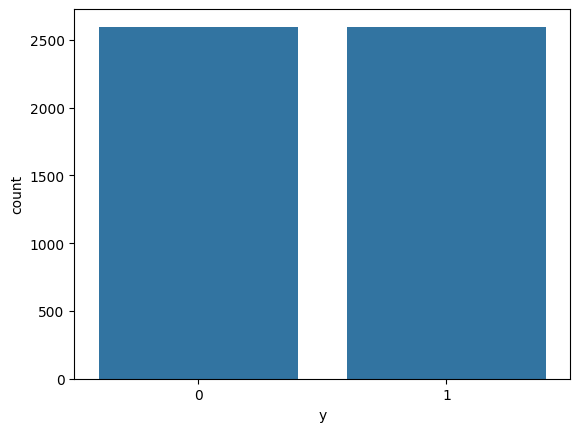

In [63]:
#Visualising the distribution of the data after applying SMOTE

sns.countplot(x=y_train_resampled)

The class imbalance has been handled and the data is now ready for model development

## Standardizing Features

In [87]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


X_train_scaled and X_test_scaled are standardized and ready for model training

In [88]:
X_train_scaled[:4,:5]

array([[ 0.44012514, -0.34309991, -0.6006593 , -1.16786479,  0.6540096 ],
       [ 1.67639624, -0.34309991,  0.46456091,  1.79672777, -0.23056036],
       [-0.60595041,  1.13252931, -0.58259707,  1.79672777, -0.67284534],
       [-0.79614597, -0.34309991, -0.44848499,  0.50777448, -0.67284534]])

## Applying Classification Algorithm - Decision Tree Decision Tree Classifier and K Nearest Neighbor (KNN)

In [66]:
#Applying and Fitting Decision Trees
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dt = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Model Accuracy: 0.8201915991156964

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1201
           1       0.24      0.26      0.25       156

    accuracy                           0.82      1357
   macro avg       0.57      0.57      0.57      1357
weighted avg       0.83      0.82      0.82      1357



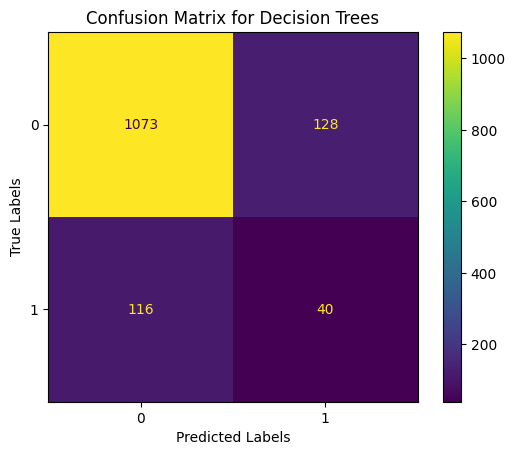

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Decision Trees")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

`True Positives` (TP = 8): The model correctly predicted 8 customers as subscribed (Yes), which matches the actual result.

`False Positives` (FP = 91): The model incorrectly predicted 91 customers as subscribed (Yes) when they actually did not (No). These are Type I errors (false alarms).

`True Negatives` (TN = 1110): The model correctly identified 1110 customers as not subscribed (No), which aligns with the actual result.

`False Negatives` (FN = 148): The model missed 148 customers who actually subscribed (Yes) but were predicted as not subscribed (No). These are Type II errors (missed detections).

`Precision`: For Yes, precision measures the accuracy of predicting that customers subscribe to term deposit. Here the precision is very low (0.08) due to high rate of false positives. this means that model only predict correctly 'yes' 8.0% of the time

`Recall`: Recall measures how well the model captures customers that subscribed to term deposits. With 148 false negatives, recall quite low (0.05) which indicates that missed a significant portion of actual subscribers (False Negatives)

`Accuracy`:The overall accuracy is 82%, the model performs fairly well on the overall dataset and on non-subscribers (No) but really struggles with prediciting actual subscribers (Yes) due to class imbalance and low precision and recall on the positive class.

In [69]:
#Apply KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier

#Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier()

In [70]:
#Evaluate the model on the test set
y_pred_knn = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Model Accuracy: 0.7324981577008106

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.83      1201
           1       0.23      0.55      0.32       156

    accuracy                           0.73      1357
   macro avg       0.58      0.65      0.58      1357
weighted avg       0.85      0.73      0.77      1357



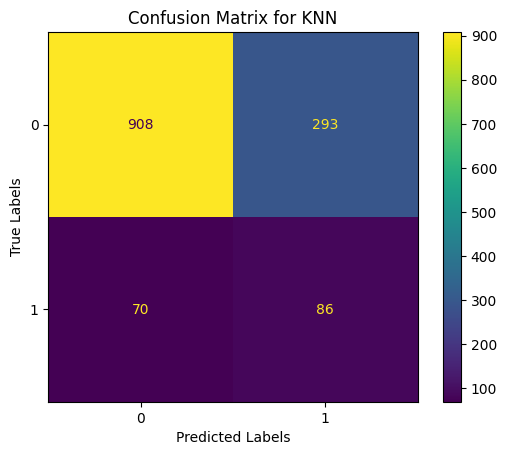

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Confusion Matrix for KNN")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

`True Positives` (TP = 84): The model correctly predicted 84 customers as subscribed (Yes), which matches the actual result.

`False Positives` (FP = 283): The model incorrectly predicted 283 customers as subscribed (Yes) when they actually did not (No). These are Type I errors (false alarms).

`True Negatives` (TN = 918): The model correctly identified 918 customers as not subscribed (No), which aligns with the actual result.

`False Negatives` (FN = 72): The model missed 72 customers who actually subscribed (Yes) but were predicted as not subscribed (No). These are Type II errors (missed detections).

`Precision`: For the positive class, precision measures the accuracy of predicting that customers subscribe to term deposit. Here the precision is low (0.23) due to high rate of false positives (283). this means that model only predict correctly the actual subscribers 23.0% of the time.

`Recall`: Recall measures how well the model captures customers that subscribed to term deposits. With 72 false negatives, recall is a little above average (0.54) which indicates that while the model captures a good amount of the time subscribers actual subscribed ('yes'), it also missed a significant portion of actual subscribers

`Accuracy`:The overall accuracy is 73.8%, the model performs well on non-subscribers (No) but struggles with subscribers (Yes) due to class imbalance and low precision on the positive class.

## Hyperparameter Tuning - Decision Tree Classifier

This step is important order to get the best hyperparameters that can be used to configure the model to get best accurate result. GridSearchCV is used to systematically test different hyperparameters values and find the optimal parameter configuration. In this case, GridSearchCV is configured to search for parameters with higher precision and recall since this is a critical metric when there is class imnbalance

**Key Hyperparameters for each model include:**

**Decision Tree Classifier**:

`max_depth`: Controls the maximum depth of the tree

`min_samples_split `: Minimum number of samples required to split a node

`min_samples_leaf`: Minimum number of samples required to be at a leaf node

`criterion`:Measures the quality of a split (gini or entropy).

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Define hyperparameters for Decision Tree
tree_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
tree = DecisionTreeClassifier(random_state=0)

# Use only accuracy for scoring
scoring = make_scorer(accuracy_score)

# Set up GridSearchCV with accuracy as the sole scoring metric
grid_tree = GridSearchCV(tree, tree_params, cv=5, scoring=scoring, refit=True)
grid_tree.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and best accuracy score
print("Best parameters for Decision Tree:", grid_tree.best_params_)
print("Best Decision Tree accuracy:", grid_tree.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Decision Tree accuracy: 0.8956312669103426


In [82]:
# Retrain the model with the best parameters

classifier_optimized = DecisionTreeClassifier(criterion = 'gini', max_depth= 10, min_samples_leaf= 2, min_samples_split= 10, class_weight='balanced', random_state=0)
classifier_optimized.fit(X_train_resampled, y_train_resampled)

y_pred_optimized_dt = classifier_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_optimized_dt)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized_dt))

Model Accuracy: 0.8636698599852616

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1201
           1       0.39      0.34      0.36       156

    accuracy                           0.86      1357
   macro avg       0.65      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357



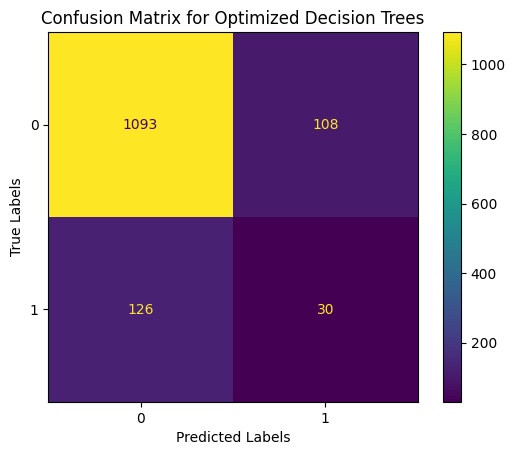

In [48]:
# Create confusion matrix after optimized model
cm_optimized_dt = confusion_matrix(y_test, y_pred_optimized_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_dt)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Optimized Decision Trees")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

#Hyperparameters Tuning for KNN

**Key Hyperparameters for each model include:**

**KNN**:

`n_neighbors`: Number of neighbors to consider for classification

`weights`: Weight function used in prediction (uniform or distance).

`metric`: Distance metric for neighbors (e.g., euclidean, manhattan).

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# hyperparameters for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# set refit to prioritize recall
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=1),
    'recall': make_scorer(recall_score, zero_division=1),
    'f1': make_scorer(f1_score, zero_division=1)
}

#GridSearchCV to select based on recall first
grid_knn = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit='recall', return_train_score=True)
grid_knn.fit(X_train_scaled, y_train_resampled)

# Output best parameters and individual scores for KNN based on highest recall
print("\nBest parameters for KNN (based on recall):", grid_knn.best_params_)
print("Best KNN recall score:", grid_knn.best_score_)
print("\nMean Test Scores for each metric:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}:", grid_knn.cv_results_[f'mean_test_{metric}'])

#selection based on precision, repeating GridSearchCV and setting refit='precision'
grid_knn_precision = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit='precision', return_train_score=True)
grid_knn_precision.fit(X_train_scaled, y_train_resampled)

print("\nBest parameters for KNN (based on precision):", grid_knn_precision.best_params_)
print("Best KNN precision score:", grid_knn_precision.best_score_)


Best parameters for KNN (based on recall): {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN recall score: 0.9846415793508816

Mean Test Scores for each metric:
Accuracy: [0.8874617  0.89692822 0.86352435 0.88120755 0.8485202  0.87245468
 0.83208589 0.86566817 0.82261873 0.86155959 0.81190253 0.85620085
 0.80707998 0.84941338 0.79653948 0.84351861 0.79689646 0.84066019
 0.91711589 0.92676146 0.90604095 0.92301098 0.89729079 0.92461908
 0.88478776 0.92354797 0.87496218 0.92051146 0.86692423 0.91801146
 0.86263804 0.91658448 0.8547801  0.91587083 0.8497777  0.91479925]
Precision: [0.82850005 0.83778669 0.79987606 0.81624661 0.78835814 0.8065224
 0.77429417 0.79928065 0.76792678 0.79532404 0.7593363  0.78950437
 0.75567177 0.78400569 0.74480534 0.77759994 0.74581907 0.77415665
 0.88809633 0.8940735  0.88557249 0.89317221 0.88864375 0.89873828
 0.89045533 0.90335893 0.88877017 0.90370041 0.89047542 0.90443371
 0.89260892 0.90591069 0.89140145 0.91097774 0.8912692  

In [75]:
#Apply KNN Algorithm using the Best parameters

from sklearn.neighbors import KNeighborsClassifier

#Initialize and train the KNN model
knn_optimized = KNeighborsClassifier(n_neighbors=3, metric = "euclidean", weights= "distance")
knn_optimized.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [76]:
#Evaluate the model on the test set after optimization

y_pred_optimized_knn = knn_optimized.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_optimized_knn)
print("KNN Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized_knn))

KNN Model Accuracy: 0.7582903463522476

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85      1201
           1       0.23      0.46      0.31       156

    accuracy                           0.76      1357
   macro avg       0.57      0.63      0.58      1357
weighted avg       0.84      0.76      0.79      1357



In [ ]:
# Create confusion matrix for the optimized model

cm_optimized_knn = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimized_knn)
disp.plot()
disp.ax_.set_title("Confusion Matrix for Optimized KNN")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")

plt.show()

# Using Ensemble Model

Ensemble Models are classification algorithms that combine the predictions of multiple “weaker” models (often called base estimators) to produce a more accurate final prediction. They’re particularly useful in handling class imbalance and complex data patterns because they aggregate predictions, reducing bias and variance.


In [91]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Initialize and train the Balanced Random Forest model
brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred_brf = brf_classifier.predict(X_test)
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report for Balanced Random Forest:\n", classification_report(y_test, y_pred_brf))


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Balanced Random Forest Accuracy: 0.8798820928518791

Classification Report for Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1201
           1       0.44      0.17      0.24       156

    accuracy                           0.88      1357
   macro avg       0.67      0.57      0.59      1357
weighted avg       0.85      0.88      0.86      1357



In [92]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost with class weight adjustments for imbalance
xgb = XGBClassifier(scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]), random_state=0)

# Train on the original or SMOTE-resampled data
xgb.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.871039056742815

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1201
           1       0.38      0.19      0.26       156

    accuracy                           0.87      1357
   macro avg       0.64      0.58      0.59      1357
weighted avg       0.84      0.87      0.85      1357



In [ ]:
## Comparing thr two Model Results - Need to review code

# Create a DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'KNN': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
})

# Melt the DataFrame for easier plotting
metrics_melted_df = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Plot the performance metrics
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted_df)
plt.title('Performance Metrics Comparison: Logistic Regression vs. Decision Tree')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Feature Importance  (Need to review)

# Extract feature importance scores from the Decision Tree model
feature_importances = random_search_dt.best_estimator_.feature_importances_

# Create a DataFrame for the feature importances
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by the importance scores
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()  # Highest values at the top
plt.show()
